In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np

## Mappeoppgave 2 - Innføring av bompenger i Tromsø: Effekt på bilisters atferd og velferd

### Kapittel 1. Innledning 

Inntekter fra bomstasjoner er blitt et stadig viktigere verktøy for å skape inntekter og redusere eksternaliteter. I Norge har inntektene fra bompenger økt fra 3 milliarder til 11 milliarder mellom 2005 til 2018, og dette utgjør 18-19% av alle bilrelaterte skatter og avgifter (Sand et al., 2022).  Bompenger spiller en viktig rolle i finansieringen av infrastruktur og regulering av trafikk. Tidligere var elbiler fritatt for bompenger frem til 2018, og etter det har de betalt reduserte priser. Dermed har bompenger også bidratt til å øke antallet elektriske kjøretøy, som er en viktig politisk målsetning for å oppnå klimamålene. Analyser om hvilke effekter bompenger har på bilister kan være nyttig av flere årsaker. Samlet sett vil det bidra til mer kunnskapsbasert politikkutforming, bedre ressursallokering og mer effektive tiltak for å møte transportrelaterte utfordringer.

Hovedfokuset i denne oppgaven er å undersøke hvilken effekt bompenger har på bilister og trafikkbildet i Tromsø. For å gjennomføre analysen vil oppgaven benytte seg av samfunnsøkonomisk teori. Oppgaven er strukturert i fire kapitler: Kapittel 1 gir en innledning oppgaven går inn på hvorfor bompenger er innført og deler erfaringer som er gjort andre steder. Kapittel 2 gir en oversikt over trafikkbildet i Tromsø før og etter innføringen av bompenger, inkludert diagrammer som viser utviklingen. Kapittel 3 tar for seg hvordan bilister tilpasser seg bompenger ved hjelp av modeller som illustrerer ulike scenarioer. Kapittel 4 er en konklusjon som oppsummerer funnene i analysen.

##### Kort om bomstasjonene

Bomstasjonene i Tromsø ble satt i drift fra og med 5. Januar. Inntektene fra bomstasjonene er bilstene sitt bidrag til finansiering av bypakken "Tenk Tromsø". Bidraget utgjør ca. 58% av bypakkens totale økonomiske ramme som er på 6,5 milliarder kroner. På Tenk Tromsø sin nettside opplyses det om at bypakken er et byutviklingsprojekt der målet er å legge til rette for gange, sykkel og kollektivtransport slik at man oppnår hovedmålet om nullvekst i personbiltransport.  

"Bypakken skal bidra til en mer fremtidsrettet by med bedre fremkommelighet for alle, bedre luft og mindre støy, som rommer vekst i antall hverdagsreiser samtidig som den sikrer et godt bymiljø for alle" (Tenk Tromsø, u.å.) 

Det er totalt installert 15 bomstasjoner i Tromsø. Disse er strategisk plassert for å fange opp de mest trafikkerte rutene i byområdet. Målet er å sikre at så mange som mulig bidrar til å betale for bompasseringene. Bilister kan bruke AutoPASS-systemet, som sikrer automatisk registrering av passeringer og korrekt rabatt. Når man bestiller en AutoPASS-avtale, mottar man en brikke som skal festes på innsiden av bilens frontrute. Hvis man ikke har en slik brikke, må man betale full pris for hver passering. Flere selskaper tilbyr AutoPASS, men rabatten er den samme uavhengig av hvilket selskap man inngår avtale med. Alle med en gyldig avtale mottar en 20% rabatt, mens elbiler med avtale får ytterligere 50% rabatt. Bompengeselskapet Nord er ansvarlig for innsamling av bompenger i Tromsø. Alle bomstasjoner har toveis innkreving, noe som betyr at man betaler bompenger i begge retninger. Man betaler kun for én passering per time, selv om man kjører gjennom flere bomstasjoner. Timebegrensningen gjelder bare for de som har en AutoPASS-avtale. Det er også en månedlig takgrense som begrenser betalingen til maksimalt 80 passeringer. Denne takgrensen gjelder for alle kalendermåneder, men kun for de med en AutoPASS-avtale. I rushtiden er det dobbel takst, som gjelder mandag til fredag mellom kl. 06:30 og 09:00 samt kl. 15:00 og 17:00. Rushtidsavgiften gjelder ikke på helligdager og offisielle fridager (Tenk Tromsø u.å.).

In [3]:
from IPython.display import Markdown
print("Takstgruppe 1 - Kjøretøy under 3,5 tonn")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |
"""
display(Markdown(tbl))

Takstgruppe 1 - Kjøretøy under 3,5 tonn



|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |


In [4]:
print("Rushtidsavgift 06:30-09:00 og 15:00-17:00")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |
"""
display(Markdown(tbl))

Rushtidsavgift 06:30-09:00 og 15:00-17:00



|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |


Priser utgjør den direkte kostnaden som påløper for bilister. Transportkostnader inkluderer både pengekostnader, reisetid og risiko. Endringer i priser kan ha innvirkning på flere områder. En økning i prisen kan påvirke hvor hyppig man reiser, hvilken rute man velger, tidspunktet man velger å reise på, og hvilken type transport man velger. Påvirkningen av pris på forbruk vurderes vanligvis ved hjelp av elastisitet, som er den prosentvise endringen i forbruk som følge av en 1% økning i pris.

### Kapittel 2. Trafikkbildet i Tromsø før og etter bompenger.

In [5]:
månedstrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/m%C3%A5nedstrafikk.csv', sep=';')
månedstrafikk = månedstrafikk.loc[(månedstrafikk.Felt == 'Totalt'), ['År','Måned','Trafikkmengde','Navn']] 
månedstrafikk = månedstrafikk.rename(columns={'År':'YEAR','Måned' : 'MONTH', 'TROMSØBRUA': 'Tromsø Brua'})
månedstrafikk['Dato'] = pd.to_datetime(månedstrafikk[['YEAR', 'MONTH']].assign(DAY=1))
månedstrafikk.drop(['YEAR','MONTH'], inplace= True, axis = 1)
månedstrafikk['Dato']= pd.to_datetime(månedstrafikk['Dato'])

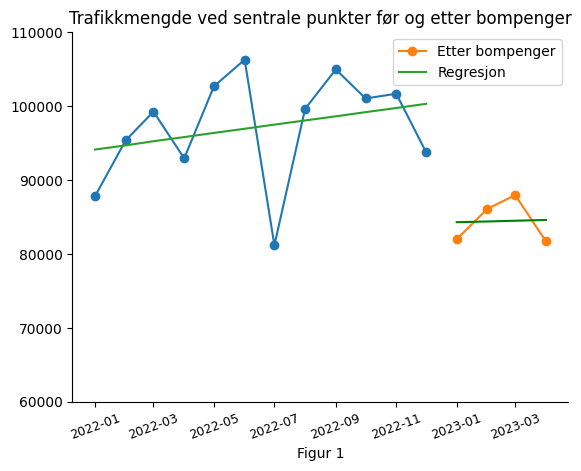

In [6]:
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None  #  Fjerner false-postive warning. 

månedstrafikksum = månedstrafikk.groupby(['Dato'])['Trafikkmengde'].sum()
månedstrafikksum = månedstrafikksum.to_frame()
månedstrafikksum = månedstrafikksum.reset_index()
månedstrafikk2022 = månedstrafikksum[månedstrafikksum['Dato'] < '2023-01-01']
månedstrafikk2023 = månedstrafikksum[månedstrafikksum['Dato'] >= '2023-01-01']

# lager regresjon av verdier før bompenger
månedstrafikk2022['Time'] = np.arange(len(månedstrafikk2022.index))
X = månedstrafikk2022.loc[:, ['Time']] 
y = månedstrafikk2022.loc[:, 'Trafikkmengde']
model = LinearRegression()
model.fit(X, y)
y_pred = pd.Series(model.predict(X), index=X.index)

# lager regresjon av verdier etter bompenger
månedstrafikk2023['Time'] = np.arange(len(månedstrafikk2023.index))
X2 = månedstrafikk2023.loc[:, ['Time']] 
y2 = månedstrafikk2023.loc[:, 'Trafikkmengde']
model = LinearRegression()
model.fit(X2, y2)
y_pred2 = pd.Series(model.predict(X2), index=X2.index)

# plotter
fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1')
ax.set_ylim(60000,110000)
ax.set_title('Trafikkmengde ved sentrale punkter før og etter bompenger')

ax.plot(månedstrafikk2022['Dato'],månedstrafikk2022['Trafikkmengde'], marker = 'o')
ax.plot(månedstrafikk2023['Dato'],månedstrafikk2023['Trafikkmengde'], marker = 'o', label = 'Etter bompenger')
ax.plot(månedstrafikk2022['Dato'],y_pred, label = 'Regresjon')
ax.plot(månedstrafikk2023['Dato'],y_pred2, color =  'green')

ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 
ax.legend(loc= 'best');

Figur 1 illustrerer trafikkmengden ved forskjellige steder i Tromsø, inkludert Breivika, Tverforbindelsen, Tromsø brua, Sandnessundbrua, Kvaløyvegen og Giæverbukta. Punktene som er valgt er jevnt fordelt over Tromsø-øya og gir et godt bilde av trafikken.

En observasjon fra figuren er at trafikkmengden etter 2023 er lavere sammenlignet med året før. De grønne linjene representerer to regresjoner, en for 2022 og en for 2023. Disse linjene gjør det tydelig at trafikkmengden er betydelig redusert. Regresjonen for 2022 viser en økende trend, mens regresjonen for 2023 er nesten helt flat.

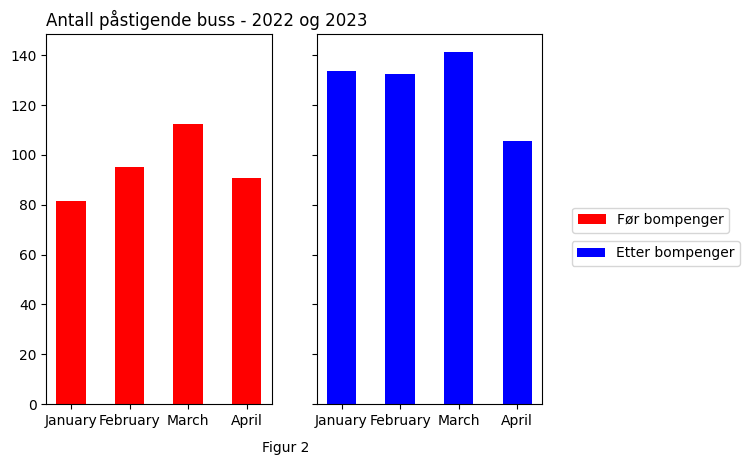

In [8]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)
df_buss2022 = df_buss[(df_buss['date'] >= '2022-01-01') & (df_buss['date'] <= '2022-04-30')]
df_buss2022 = df_buss2022.groupby(['date'])['Påstigende'].sum() 
df_buss2022 = df_buss2022.to_frame()
df_buss2022 = df_buss2022.reset_index()

# før bompenger
df_måned = df_buss2022.groupby(df_buss2022['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned = df_måned.to_frame()
df_måned = df_måned.reset_index()
df_måned['Påstigende'] = df_måned['Påstigende'].div(10000)
months = ["January","February","March","April"]
df_måned['date'] = pd.Categorical(df_måned['date'], categories= months, ordered=True)
df_måned.sort_values(by='date', inplace=True)

# etter bompenger
df_buss2 = df_buss[(df_buss['date'] >= '2023-01-01') & (df_buss['date'] <= '2023-04-30')]
df_måned2 = df_buss2.groupby(df_buss2['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned2 = df_måned2.to_frame()
df_måned2 = df_måned2.reset_index()
df_måned2['Påstigende'] = df_måned2['Påstigende'].div(10000)
months2 = ["January", "February", "March", "April"]
df_måned2['date'] = pd.Categorical(df_måned2['date'], categories= months2, ordered=True)
df_måned2.sort_values(by='date', inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.bar(df_måned['date'],df_måned["Påstigende"], width = 0.5 ,color = 'red',label = 'Før bompenger')
ax2.bar(df_måned2['date'],df_måned2["Påstigende"], width = 0.5 , color='blue',label = 'Etter bompenger')
ax1.set_title('Antall påstigende buss - 2022 og 2023', loc = 'left')
ax1.legend(bbox_to_anchor=(3.06,0.55))
ax2.legend(bbox_to_anchor=(1.1,0.46))
txt = 'Figur 2'
fig.text(.5, .01, txt, ha='center');

Kollektiv transport er et alternativ til personbil tranport, og kan brukes som substitutt. Derfor kan man forvente at etterspørselen etter den ene øker dersom prisen den andre går opp. Figur 2 viser antall påstigende på bussen før og etter innføringen av bompenger. Verdiene er delt på 10 000, slik at 80 tilsvarer 800 000. Vi kan observere at antall påstigende passasjerer har økt fra 2022 til 2023. I Januar har antallet økt med nesten 64%, noe som er en betydelig økning fra året før. 

In [16]:
import requests
from pyjstat import pyjstat
postUrl = "https://data.ssb.no/api/v0/no/table/12576/"
apiQuery = { "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:FylkerGjeldende",
        "values": [
          "54"
        ]
      }
    },
    {
      "code": "Kjoretoytype",
      "selection": {
        "filter": "item",
        "values": [
          "15"
        ]
      }
    },
    {
      "code": "DrivstoffType",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "18"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "GjsnittKjorelengde"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020",
          "2021",
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }}
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds
df_kmkjørt, df_id, ds = apiToDataframe(postUrl, apiQuery)
df_kmkjørt

,region,kjøretøytype,drivstofftype,statistikkvariabel,år,value
0,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Bensin,Gjennomsnittlig kjørelengde per kjøretøy (km),2020,7682
1,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Bensin,Gjennomsnittlig kjørelengde per kjøretøy (km),2021,7779
2,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Bensin,Gjennomsnittlig kjørelengde per kjøretøy (km),2022,7476
3,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Elektrisitet,Gjennomsnittlig kjørelengde per kjøretøy (km),2020,10157
4,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Elektrisitet,Gjennomsnittlig kjørelengde per kjøretøy (km),2021,10950
5,Troms og Finnmark - Romsa ja Finnmárku,Personbiler i alt,Elektrisitet,Gjennomsnittlig kjørelengde per kjøretøy (km),2022,11334


### Kapittel 3. Bilisters tilpasning til bompenger. 

Modellen som brukes i analysen er en forenkling av virkeligheten. Modellen bygger på noen forutsetninger: 
- Konsumenten velger mellom to goder som kan måles i noe entydig, som i dette tilfellet er kroner. 
- Nytten fra konsum er kun avhengig av eget konsum. 
- Prisene tas for gitt og konsumenten har full oversikt over egenskapene til godene. 
- Hele inntekten til konsumenten går til konsum, sparing blir således sett bort ifra. 
- Formålet til konsumenten er å makismere sin nytte, ved å konsumere mest mulig. 

Konsumenten kan velge mellom andre goder og antall kilometer kjørt. Begge valgmulighetene er blitt omgjort til kroner, slik at det blir et mål i penger. Andre goder er blitt gitt prisen 1, mens antall kilometer kjørt er regnet om til pris per kilometer kjøring. 

##### Budsjettbetingelse 

Gitt at hele innteken brukes på konsum må høyre siden være lik venstre siden. Budsjettbetingelsen formuleres dermed slik: 

\begin{equation}
   p_1x_1 + p_2x_2 = m \tag{1}
\end{equation}

For å tegne en budsjettlinje trenger vi et budsjett (m). Ifølge Statistisk sentralbyrå (SSB) var gjennomsnittsinntekten i 2022, 644 680 kroner. Vi kan regne om og bruke dette som et estimat for konsumentems daglige budsjett. Vi trenger også prisen på gode 1 og gode 2. Transportøkonomisk institutt (TØI) har funnet at kostnadene per kilometer for 2022 i gjennomsnitt var 3,03 kroner. Modellen vil benytte dette estimatet for kostnaden per kilometer før innføringen av bompenger. Vi trenger også kostnaden som påføres bilistene etter innføringen av bompenger. I en artikkel fra Nordlys (26. april 2023) har vi fått ferske tall fra Tenk Tromsø. De opplyser at en gjennomsnittlig bilist i Tromsø brukte 366 kroner på bompenger i mars. Vi kan bruke dette tallet til å beregne kostnaden dette utgjør per kilometer ved å først dele månedsbeløpet på antall dager i måneden, og deretter dele på antall kilometer som kjøres i gjennomsnitt per dag. Ved å legge dette tallet til den avstandsavhengige kostnaden, finner vi at kostnaden etter bompenger er 3,61 kroner. 

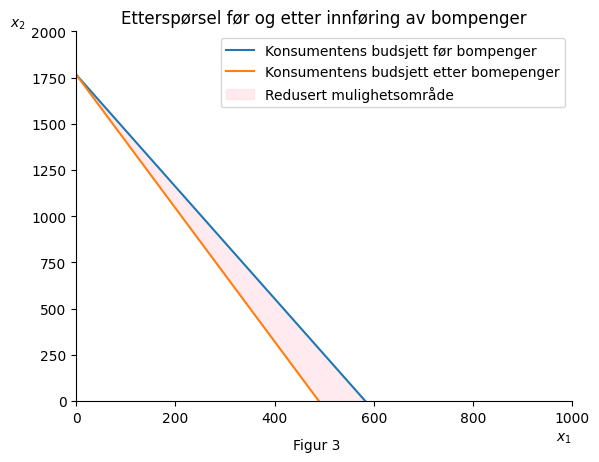

In [14]:

def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

x = np.linspace(0.001,1000,1000)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.set_xlim(0,1000)
                ax.set_ylim(0,2000)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x, budsjett(1766, 3.03, 1, x), label = 'Konsumentens budsjett før bompenger')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bomepenger')

ax.fill_between(x, budsjett(1766, 3.03, 1, x), budsjett(1766, 3.61, 1, x), color = "pink",alpha = 0.3,label='Redusert mulighetsområde')

ax.set_title('Etterspørsel før og etter innføring av bompenger')
ax.legend(loc = 'best')
txt = 'Figur 3'
fig.text(.5, .01, txt, ha='center');


Ved å bruke estimatene har jeg i figur 3 tegnet en budsjettbetingelse. Budsjettlinjene viser hvilke begrensninger konsumenten står ovenfor når han skal velge mellom antall km kjøring og andre goder. Budsjettlinjens skjæring med x1 aksen markerer hvor mye konsumenten maksimalt har råd til visst han bruker hele sitt budsjett på godet, tilsvarende gjelder for skjæringen med x2. Vi kan finne skjæringen ved x1 aksen ved å sette å sette x2 = 0. 

\begin{equation}
   P_1x_1 + p_20 = m \rightarrow m = p_1x_1  \rightarrow x_1 = m/p_1
\end{equation}

Konsumenten sitt mulighetsområde består av alle kombinasjoner av x1 og x2 som ligger innenfor eller på budsjettlinjen. Punkter utenfor er ikke oppnåelig for konsumenten. Figur 3 viser budsjettet til en bilist før og etter bompenger. Vi observerer et skifte i budsjettlinjen, der konsumenten sitt mulighetsområde reduseres som følge av den økte kostnaden ved bil kjøring. Det reduserte mulighetsområdet vises som det rosa området. Budsjettlinjen får en ny helning, og blir brattere. Skjæringspunktet med x1 aksen forflyttes til venstre og brøken blir mindre. Virkningen av de økte kostnadene i konsum av gode 1 er at kjøpekaften blir redusert. Dette kommer oppgaven tilbake til senere. 

In [11]:
# symboler
x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
U

# vi må løse for x_2 og et gitt nyttenivå
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]
x_2_ind_sol

# gjør om for å plotte

indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(U_0,a,b,x_1)

# nye symboler
p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*x_1+p_2*x_2

# Beregne MSB

msb = sp.diff(U, x_1)/sp.diff(U,x_2)

# Løs likning (14)

x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]

# sett inn i m og løs for x_1

budsj=bud.subs(x_2,x_2_rel)
x_1_eq= sp.solve(budsj-m,x_1)[0]

# dette er likevektsløsning for x_1
#sett inn i x_2_rel for å få x_2_eq

x_2_eq= x_2_rel.subs(x_1,x_1_eq)

In [157]:
# steg 1 har vi løst x_1_eq og x_2_eq

# steg 2
U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

# Vi kan bruke tall i et oppslag for å regne numeriske verdier
# her er et eksempel
# la oss lage noen tall i et oppslag
in_dict = {"a":0.035,"b":0.965,"m":1766,"p_1":3.02,"p_2":1}

# Vi bruker disse tallene til å finne nytten som oppnås samt etterspørsel

nytte=sp.sympify(U_max).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_1_num=sp.sympify(x_1_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_2_num=sp.sympify(x_2_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})

# steg 3 
# vi har laget x_2_ind_sol som løsning
# og vi har laget en funksjon ved lambdify: indiff_x_2(U_0,a,b,x_1)

# Ta a=.4, b=.25, m=2000, p_1=25, p_2=40

# finn verdien for U_max, x_1_eq og x_2_eq


nytte = U_max.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.02),(p_2,1)])
x_1_num = x_1_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.02),(p_2,1)])
x_2_num = x_2_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.02),(p_2,1)])

nytte2 = U_max.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.61),(p_2,1)])
x_1_num2 = x_1_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.61),(p_2,1)])
x_2_num2 = x_2_eq.subs([(a,0.049),(b,0.951),(m,1766),(p_1,3.61),(p_2,1)])

display(nytte)
display(x_1_num)
display(x_2_num)

display(nytte2)
display(x_1_num2)
display(x_2_num2)


1375.75037089129

28.6536423841060

1679.46600000000

1363.77311886464

23.9706371191136

1679.46600000000

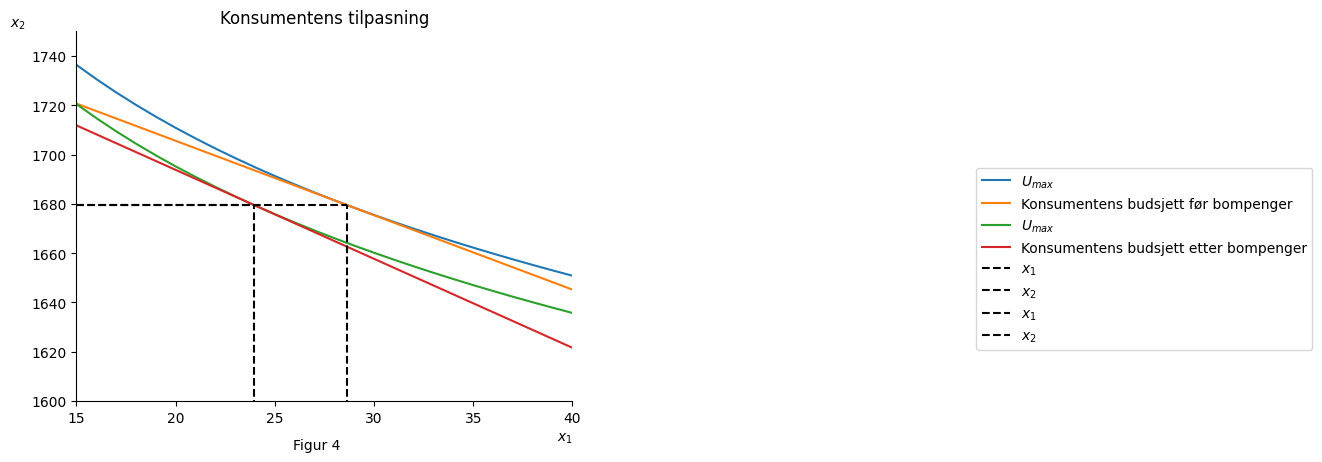

In [106]:
fig, ax = plt.subplots()
ax.set_ylabel('$x_2$', loc='top', rotation=0)
ax.set_xlabel('$x_1$', loc='right')
ax.set_xlim(0,1000)
ax.set_ylim(0,2000)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# før bompenger
ax.plot(x, indiff_x_2(nytte,0.049,0.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.02, 1, x), label = 'Konsumentens budsjett før bompenger')

# etter bompenger
ax.plot(x, indiff_x_2(nytte2,0.049,0.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bompenger')

# tilpasningen
ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num,0,x_1_num, color='black',ls='dashed', label='$x_2$')

ax.vlines(x_1_num2,0,x_2_num2, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num2,0,x_1_num2, color='black',ls='dashed', label='$x_2$')

# tittel
ax.set_title('Konsumentens tilpasning')

#vis navnene:
ax.legend(bbox_to_anchor=(1.8,0.65));

plt.ylim(1600,1750)
plt.xlim(15,40)
txt = 'Figur 4'
fig.text(.5, .01, txt, ha='center');

##### Cobb-Douglas modellen

For å konstruere en Cobb-Douglas-modell trenger vi verdier for kostnad, budsjett og nyttepreferanse. Estimater for kostnad og budsjett har vi allerede funnet i budsjettbetingelsen. Nyttepreferanse er derimot ikke mulig å lage et estimat på, oppgaven har derfor valgt verdier som tegner et realistisk bilde av virkeligheten. For å oppnå dette har jeg brukt verdier på nytte som passer med det vi vet om bilister i Tromsø. SSB oppgir at en gjennomsnittlig bilist i Tromsø kjører 10 479 km i året, dette blir 28,7 km for dagen. Ved å oppgi en nyttepreferanse som er lik 0,049 på gode x1 og 0,951 på x2, finner vi at konsumenten tilpasser seg tilnærmet nøyaktig på 28,7 km for dagen. 

Det er flere forhold som påvirker etterspørsel, der en av de viktigste faktorene er prisen. Når prisen øker vil etterspørselen vanligvis synke. Det er dette vi ser av figur 4. Før innføringen av bompenger kjørte konsumenten 28,7 kilometer, og brukte 1679,5 kroner på andre goder. Når bompengene innføres tilpasser konsumenten seg å kjører 23,4 kilometer, mens den bruker like mye som før på andre goder. Konsumenten etterspør mindre kilometer kjøring, noe som i denne modellen tilsvarer en reduksjon på ca 18,5%. Konsumenten befinner seg nå på en ny indifferenskurve som har et lavere nyttenivå. 

Her observerer vi at endringen i prisen på gode 1 (pris per kilometer) ikke påvirker forbruket av gode 2 (andre goder). Dette indikerer en uavhengighet mellom godene når det gjelder konsum. Når prisen på kjøring øker, reduseres ikke konsumet av andre goder. Dette er spesielt for Cobb-Douglas-funksjoner, da det ikke er noen krysspriselastisitet, og er en svakhet med C-D modellen. 

Elastisiteten til etterspørselen etter kjørelengde er på kort sikt spesielt avhengig av substitusjonsmulighetene i markedet, det vil si hvor lett det er å bytte ut personbiltransport med andre transportmidler, som for eksempel kollektivtransport. Det er også avhengig av hvor stor andel av budsjettet som brukes på konsum av godet. Jo større andel av budsjettet, desto mer elastisk er etterspørselen.

Siden etterspørselen etter et antall km kjøring faller, er det naturlig at etterpørselen etter alterntive goder øke (alt annet likt). Dette skjer på grunn av at det alternative goder nå er blitt relativt billigere, og kalles for substitusjonseffekten. 

Prisøkningen påvirker også konsumentens kjøpekraft, noe som fører til redusert etterspørsel, og kalles for inntektseffekten. 


24.1811577387412

1694.21580498877

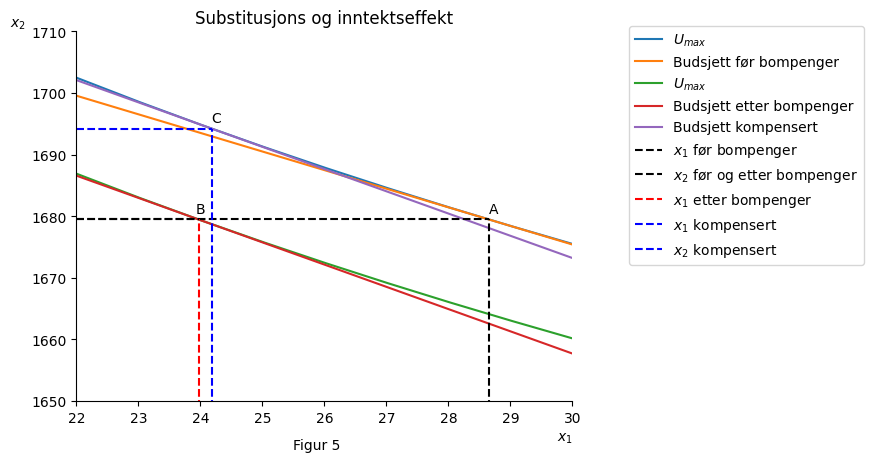

In [171]:
fig, ax = plt.subplots()
ax.set_ylabel('$x_2$', loc='top', rotation=0)
ax.set_xlabel('$x_1$', loc='right')
ax.set_xlim(0,1000)
ax.set_ylim(0,2000)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# før bompenger
ax.plot(x, indiff_x_2(nytte,.049,.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.02, 1, x), label = 'Budsjett før bompenger')

# etter bompenger
ax.plot(x, indiff_x_2(nytte2,.049,0.951,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Budsjett etter bompenger')


# forskyvning av budsjett
komp = nytte/nytte2
nyttbudsjett = 1766*komp

ax.plot(x, budsjett(nyttbudsjett, 3.61, 1, x), label = 'Budsjett kompensert')

x_1_num_komp = x_1_eq.subs([(a,0.049),(b,0.951),(m,nyttbudsjett),(p_1,3.61),(p_2,1)])
x_2_num_komp = x_2_eq.subs([(a,0.049),(b,0.951),(m,nyttbudsjett),(p_1,3.61),(p_2,1)])


# tilpasningen
ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$ før bompenger')
ax.hlines(x_2_num,0,x_1_num, color='black',ls='dashed', label= '$x_2$ før og etter bompenger' )

ax.vlines(x_1_num2,0,x_2_num2, color='red',ls='dashed', label='$x_1$ etter bompenger')
ax.hlines(x_2_num2,0,x_1_num2, color='black',ls='dashed')

ax.vlines(x_1_num_komp,0,x_2_num_komp, color='blue',ls='dashed', label='$x_1$ kompensert')
ax.hlines(x_2_num_komp,0,x_1_num_komp, color='blue',ls='dashed', label='$x_2$ kompensert')

# tittel
ax.set_title('Substitusjons og inntektseffekt')

# vis navnene:
ax.legend(bbox_to_anchor=(1.1,0.35))

# punkter på graf
ax.annotate('A',xy=(x_1_num,x_2_num+1), size = 10)
ax.annotate('B',xy=(x_1_num2-0.05,x_2_num2+1), size = 10)
ax.annotate('C',xy=(x_1_num_komp,x_2_num_komp+1), size = 10)

plt.ylim(1650,1710)
plt.xlim(22,30)
txt = 'Figur 5'
fig.text(.5, .01, txt, ha='center');

display(x_1_num_komp)
display(x_2_num_komp)

\begin{equation}
   A \rightarrow B = substitusjonseffekten
\end{equation}

\begin{equation}
B \rightarrow C =  inntektseffekten 
\end{equation}

\begin{equation}
A \rightarrow C =  totaleffekten 
\end{equation}

I bevegelsen fra punkt A til B observerer vi subtitusjonseffekten. 

In [163]:
subtitusjonseffekten  = x_1_num-x_1_num2
display(subtitusjonseffekten)

inntektseffekten = x_1_num2-x_1_num_komp
display(inntektseffekten)

totaleffekten = x_1_num-x_1_num_komp
display(totaleffekten)

4.68300526499239

-0.210520619627665

4.47248464536472

### Kapittel 4. Konklusjon 